In [30]:
# importing Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from datetime import datetime

In [35]:
# Our List of 10 Stocks
stocks=['MON', 'KO', 'CL', 'PEP', 'COST', 'MRK', 'PFE', 'T', 'NEE', 'BMY']

In [36]:
# Creating Dataframe of all closing prices of stocks
#Creating date variables
starting='2017-01-01'
now=datetime.now()
buy_on_date = now.strftime("%Y-%m-%d")

#Dictionary of the stock to stock price data
stock_prices={}

for i in (range(0,len(stocks))):
    stock_prices[stocks[i]]=pd.DataFrame(yf.Ticker(stocks[i]).history(start=starting,end=buy_on_date).Close)
    stock_prices[stocks[i]].columns=[stocks[i]+" Closing"]

# #Creating stock price dataframe
stocks_df=stock_prices[stocks[0]]
for i in (range(1,len(stocks))):
    stocks_df=pd.concat([stocks_df,stock_prices[stocks[i]]],join='inner',axis=1)

#Output dataframe of closing prices
stocks_df

,MON Closing,KO Closing,CL Closing,PEP Closing,COST Closing,MRK Closing,PFE Closing,T Closing,NEE Closing,BMY Closing
Date,,,,,,,,,,
2021-03-16,9.785,50.456142,74.579491,132.132370,325.413055,72.021919,34.855968,28.404474,74.312981,60.477669
2021-03-17,9.680,50.475845,74.520508,131.747833,327.342194,72.481377,34.817055,28.556017,71.927238,60.751236
2021-03-18,9.770,49.815834,74.785942,130.673111,321.167053,72.453247,34.797600,28.423418,70.123138,60.897789
2021-03-19,9.750,50.052258,73.714333,132.615509,327.063751,72.678284,34.564121,28.186634,69.837250,61.259289
2021-03-22,9.700,50.239422,74.490997,135.869278,332.612427,72.678284,35.021347,28.404474,70.675217,61.923660
...,...,...,...,...,...,...,...,...,...,...
2021-11-18,9.740,55.410000,76.389999,163.419998,529.369995,83.050003,51.410000,24.389999,87.213722,59.040001
2021-11-19,9.760,55.130001,77.199997,163.809998,533.789978,80.699997,50.799999,24.129999,87.920593,57.830002
2021-11-22,9.750,55.470001,77.559998,164.149994,539.650024,81.639999,51.200001,24.700001,86.974785,57.040001


We will show how including less correlated stocks into a portfolio one by one, reduces the standard deviation/volatility of a portfolio and therefore make it less prone to market fluctuations and give the customer a safe and close-to risk-free portfolio as possible.

In [39]:
#Get the STD of our highest volatile stock from the list
#Computing daily returns using log change
#This means a log change of +0.1 today and then -0.1 tomorrow will give you the same value of stock as yesterday. 
#This is not true if you simply compute percentage change.
daily_return = stocks_df.pct_change().apply(lambda x: np.log(1+x))
daily_return=daily_return.iloc[1: ,:]

#print daily log change returns
daily_return

,MON Closing,KO Closing,CL Closing,PEP Closing,COST Closing,MRK Closing,PFE Closing,T Closing,NEE Closing,BMY Closing
Date,,,,,,,,,,
2021-03-17,-0.010789,0.000390,-0.000791,-0.002914,0.005911,0.006359,-0.001117,0.005321,-0.032631,0.004513
2021-03-18,0.009255,-0.013162,0.003556,-0.008191,-0.019045,-0.000388,-0.000559,-0.004654,-0.025402,0.002409
2021-03-19,-0.002049,0.004735,-0.014433,0.014755,0.018194,0.003101,-0.006732,-0.008365,-0.004085,0.005919
2021-03-22,-0.005141,0.003732,0.010481,0.024239,0.016823,0.000000,0.013142,0.007699,0.011927,0.010787
2021-03-23,-0.004132,0.007618,0.025796,0.011974,0.017338,-0.016127,-0.017938,0.000333,0.031984,-0.012064
...,...,...,...,...,...,...,...,...,...,...
2021-11-18,0.000000,-0.008983,-0.015458,0.000306,0.005835,0.005433,0.010559,-0.011009,-0.002053,-0.006752
2021-11-19,0.002051,-0.005066,0.010548,0.002384,0.008315,-0.028704,-0.011936,-0.010717,0.008072,-0.020707
2021-11-22,-0.001025,0.006148,0.004652,0.002073,0.010918,0.011581,0.007843,0.023347,-0.010816,-0.013755


In [48]:
#most volatile stock std
high_volatile=daily_return['MRK Closing'].std()
high_volatile

0.015287617183678635

In [50]:
#std of whole portfolio
std_portfolio=(daily_return.std().sum())/len(stocks)
std_portfolio

0.010177996508055547

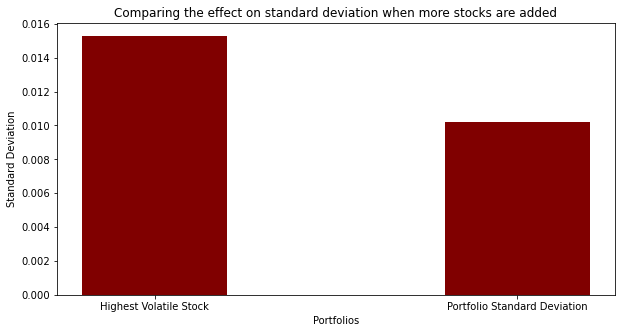

In [52]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(['Highest Volatile Stock','Portfolio Standard Deviation'], [high_volatile,std_portfolio], color ='maroon',
        width = 0.4)
 
plt.xlabel("Portfolios")
plt.ylabel("Standard Deviation")
plt.title("Comparing the effect on standard deviation when more stocks are added")
plt.show()

Our final list of stocks consisted of a set of 10 somewhat negatively correlated stocks mixed in with those with the lowest standard deviations of the 'Tickers.csv' file. Here the stock with the highest std in our `stocks` was 'MRK', a pharmaceutical company that has seen minimal but greater than the other stocks on `stocks` in volatility. By itself in a portfolio, the standard deviation of that portfolio would be around **15.3%** When the other stocks in `stocks` are added in, we see a decrease in **5%** to **10.2%** in the standard deviation. This implies that a set of other negatively correlated and lower standard deviation stocks can infact decrease the risk of a portfolio and make it a more safer-portfolio for the end-consumer. 

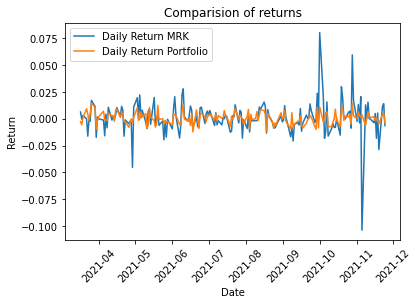

In [58]:
#Create a graph plotting returns of MRK(highest volatile stock in list) vs the average returns of the whole list
plt.plot(daily_return['MRK Closing'], label="Daily Return MRK")
plt.plot(daily_return.sum(axis=1)/len(stocks), label="Daily Return Portfolio")
plt.xlabel("Date")
plt.ylabel("Return")
plt.title("Comparision of returns")
plt.xticks(rotation=45)

plt.legend(loc='best')
plt.show()

By adding in a graph of the returns of `daily_return['MRK Closing']` and `daily_return` we can see  that the returns of MRK are greater from a daily standpoint then the returns of the whole portfolio and we see those big spikes in '2021-10' and '2021-11' that traders may have taken advantage of to make a hefty return through selling or shorting. The daily returns of the whole portfolio is seen as hidden in-between the daily returns of MRK and seen to be not as volatile. This come froms the above fact that the standard deviation of the whole portfolio is a whole 5% less than MRK's. This means there would is less movement on average in the returns for the whole portfolio, making it a great investment for a safe-value investor. 

Affluence Funds Management, an investment management firm based out in Brisbane studied the volatility characterisitcs of different investment types and came with a few findings that I feel resonate with our analysis. Obviously a single stock is more volatile then a basket of stocks from a concept called diversification. If we look at our list of stocks computed algorithmically using concepts from the MPT such as correlation, corvariance and standard deviation; we see that our list is comprised of stocks from different sectors that would react differently to an shock or minimal shock event. That in simple terms is the reasoning behind diversification. Our list comprises of a decent weightage of consumer stocks which are needed throughout any event humanity is facing. Through this diversification of stocks we have mitigated unsystematic risk. 